In [1]:
import os  
from mpl_toolkits import mplot3d

#python routine to help show how broken the C 
#standard library random number generator is.
#generate a bunch of random triples.  If plotted
#correctly, it becomes obvious they aren't 
#anywhere close to random.

import numpy as np
import ctypes
import numba as nb
import time
from matplotlib import pyplot as plt

# mylib=ctypes.cdll.LoadLibrary("libc.dylib")
# rand=mylib.rand
# rand.argtypes=[]
# rand.restype=ctypes.c_int


# @nb.njit
# def get_rands_nb(vals):
#     n=len(vals)
#     for i in range(n):
#         vals[i]=rand()
#     return vals

# def get_rands(n):
#     vec=np.empty(n,dtype='int32')
#     get_rands_nb(vec)
#     return vec


# n=300000000
# vec=get_rands(n*3)
# #vv=vec&(2**16-1)

# vv=np.reshape(vec,[n,3])
# vmax=np.max(vv,axis=1)

# maxval=1e8
# vv2=vv[vmax<maxval,:]

# f=open('rand_points_linux.txt','w')
# for i in range(vv2.shape[0]):
#     myline=repr(vv2[i,0])+' '+repr(vv2[i,1])+' '+ repr(vv2[i,2])+'\n'
#     f.write(myline)
# f.close()

In [2]:
c_rand = np.transpose(np.loadtxt('rand_points.txt'))

<IPython.core.display.Javascript object>


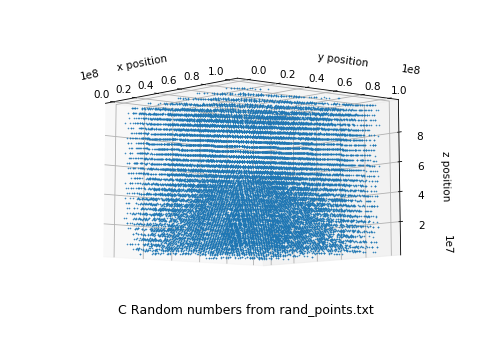

In [42]:
%matplotlib notebook

ax = plt.axes(projection='3d')
ax.plot3D(c_rand[0],c_rand[1], c_rand[2],'o',markersize=0.5)
ax.set_ylabel('y position')
ax.set_xlabel('x position')
ax.set_zlabel('z position')
ax.set_title('C Random numbers from rand_points.txt',y = 0)
plt.show()


In the random 3d plot above, all the points have 'randomly' generated (x,y,z) values given by a C library. When plotted and viewed from the right angle, you actually see the planes that the assignment question mentions. So clearly, these aren't actually random

<IPython.core.display.Javascript object>


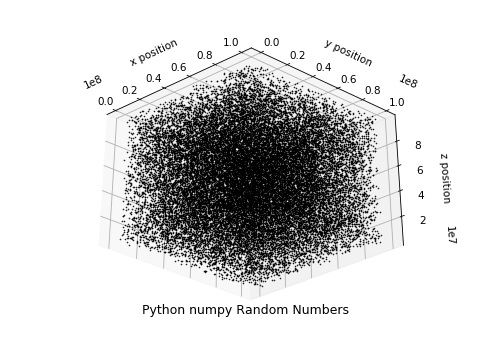

Text(0.5, 0.0, 'Python numpy Random Numbers')

In [48]:
#now we can test python's random number generator! 


x_rand = np.random.randint(0,1e8,len(c_rand[0]))
y_rand = np.random.randint(0,1e8,len(c_rand[0]))
z_rand = np.random.randint(0,1e8,len(c_rand[0]))

%matplotlib notebook

ax = plt.axes(projection='3d')
ax.plot3D(x_rand,y_rand,z_rand,'ko',markersize=0.5)
ax.set_ylabel('y position')
ax.set_xlabel('x position')
ax.set_zlabel('z position')
ax.set_title('Python numpy Random Numbers',y = 0)


This plot above shows randomly generated (x,y,z) coordinates from numpy in Python. I moved this plot around in the same way as the one above and found no patterns in the distribution of points. So this generator actually works! Cool! 

<IPython.core.display.Javascript object>


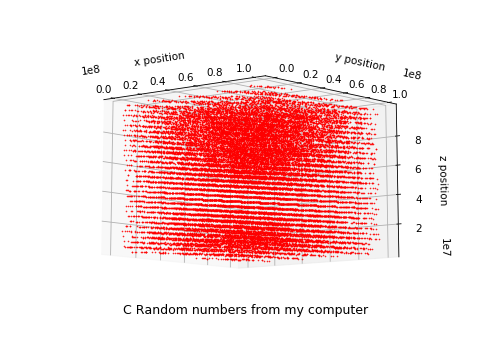

Text(0.5, 0.0, 'C Random numbers from my computer')

In [47]:
my_rand = np.transpose(np.loadtxt('rand_points_linux.txt'))
%matplotlib notebook

ax = plt.axes(projection='3d')
ax.plot3D(my_rand[0],my_rand[1], my_rand[2],'ro',markersize=0.5)
ax.set_ylabel('y position')
ax.set_xlabel('x position')
ax.set_zlabel('z position')
ax.set_title('C Random numbers from my computer',y = 0)

This is the 'randomly' generated (x,y,z) values from my own laptop. I used the code provided to us. It's included above but commented out. Clearly, my local random number generator produces the same plane patterns as the one from rand_points.txt and is therefore not a good random number generator. 

I saved the file as rand_points_linus.txt and I'm not sure why, because I have a mac :/ . Will be more sensical next time. 

<IPython.core.display.Javascript object>


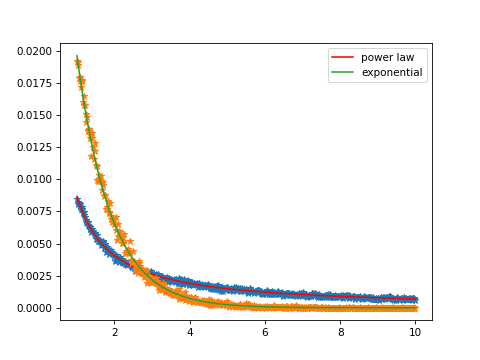

acceptance percentage 5.3964


In [53]:
# For problem 2, I'd imagine we can use a power law
# And extract an exponential curve from that 
# That seems to be the most obvious, since they have a similar shape 

# This is a snippet of code Prof. Sievers posted that generates a power law 
plt.ion()
N=1000000
alpha= 1.1
alpha_e = 1.1
x=np.random.rand(N)

def pow_dev(x):
    s=x**(1/(1-alpha))
    return 0.5*s 

t = pow_dev(x)
y = np.random.rand(N)*t**(-alpha)

bins=np.linspace(1,10,501)
aa,bb=np.histogram(t,bins)
aa=aa/aa.sum()

cents=0.5*(bins[1:]+bins[:-1])
pred= 0.5*cents**(-alpha)
pred=pred/pred.sum()

my_exp = alpha_e*np.exp(-alpha_e*cents) 
my_exp = my_exp/my_exp.sum()

accept = y < alpha_e*np.exp(-alpha_e*t) 
t_use = t[accept]

aaa, bbb = np.histogram(t_use,bins)
aaa = aaa/aaa.sum()
my_exp = my_exp/my_exp.sum()

plt.clf()
plt.plot(cents,aa,'*')
plt.plot(cents,pred,'r',label='power law')
plt.plot(cents,aaa,'*')
plt.plot(cents,my_exp,'-',label='exponential')
plt.legend()
plt.show()

print('acceptance percentage',(len(t_use)/len(y))*100)



<IPython.core.display.Javascript object>


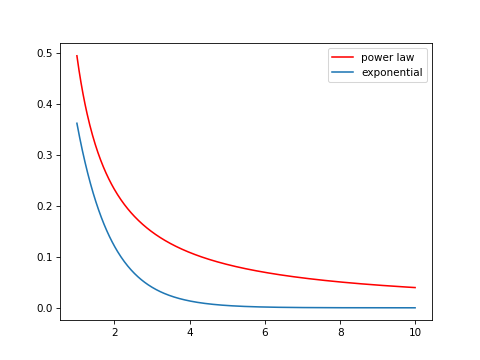

In [55]:
aa_nonorm,bb_nonorm=np.histogram(t,bins)

pred_nonorm = 0.5*cents**(-alpha)
my_exp_nonorm = alpha_e*np.exp(-alpha_e*cents) 

plt.clf()
#plt.plot(cents,aa_nonorm,'*')
plt.plot(cents,pred_nonorm,'r',label='power law')
plt.plot(cents,my_exp_nonorm,label = 'exponential')
plt.legend()
plt.show()

The plot above shows the power law and its deviates which are being sampled from, and the exponential curve and its deviates resulting from our rejection method. In this plot, it looks like the exponential curve is above the power law at the beginning, but this is because the plots are normalized. When they aren't normalized the exponential actually lies way below the power law. This also explains why my acceptance percentage is so low!

<IPython.core.display.Javascript object>


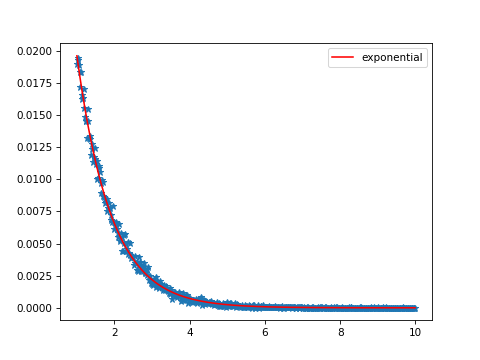

acceptance percentage 51.3929


In [65]:
# Question 2 but with a lorentzian 

def lorentzians(n):
    q=np.pi*(np.random.rand(n)-0.5)
    return np.tan(q)

t_lor=lorentzians(N)
y_lor=1.5/(1+t_lor**2)*np.random.rand(N)*2

my_lor=1/(1+cents**2)*5

accept_lor=y_lor<np.exp(-alpha_e*t_lor)
t_use_lor=t_lor[accept_lor]

aaA,bbB=np.histogram(t_lor,bins)
aaA=aaA/aaA.sum()

aa_lor,bb_lor=np.histogram(t_use_lor,bins)
aa_lor=aa_lor/aa_lor.sum()

plt.clf()
plt.plot(cents,aa_lor,'*')
plt.plot(cents,my_exp,'r',label='exponential')
plt.legend()
plt.show()

my_lor = my_lor/my_lor.sum()
# plt.clf()
# plt.plot(cents,my_exp,'b',label='exp')
# plt.plot(cents,my_lor,'r',label='lor')
# plt.legend()
plt.show()
print('acceptance percentage',(len(t_use_lor)/len(y_lor))*100)


<IPython.core.display.Javascript object>


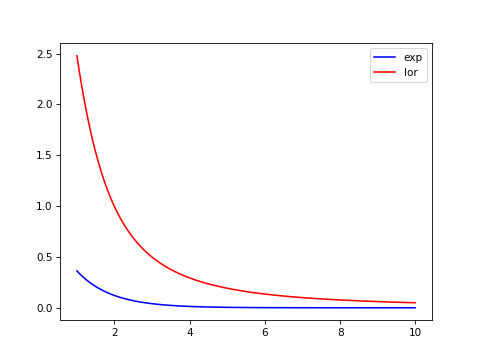

In [67]:
my_lor=1/(1+cents**2)*5

aaA_nonorm,bbB_nonorm=np.histogram(t_lor,bins)

plt.clf()

plt.plot(cents,my_exp_nonorm,'b',label='exp')
plt.plot(cents,my_lor,'r',label='lor')
plt.legend()
plt.show()

The plots here are the same as the ones before, but using a lorentzian in the rejection. The acceptance percentage here is way higher! This would mean that it's way easier/efficient to use half a Lorentzian to retrieve an exponential than it is to use a power law. I'd imagine you cam reparametrize both curves to get higher acceptance fractions. But presumably the Lorentzian will always be better.

<IPython.core.display.Javascript object>


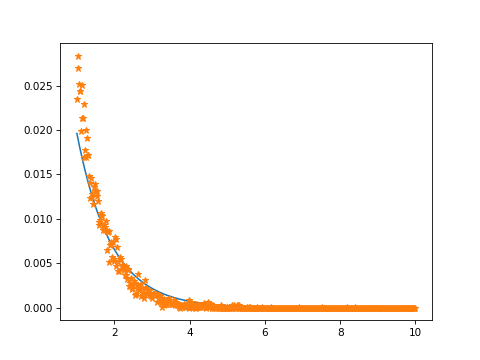

acceptance percentage 49.943


In [69]:
# Question 3 
# We're told u is bounded by 0 and 1, so we can calculate bounds on v! 

n=100000
u=np.random.uniform(0,1,size=n)
v = np.random.uniform(0,-(u/alpha_e)*np.log((u/alpha_e)**2),size=n)

r=v/u

accept_rat=u<alpha_e*np.exp(-alpha_e*r)
t_rat=r[accept_rat]

aa_rat, bb_rat = np.histogram(t_rat,bins)
aa_rat = aa_rat/aa_rat.sum()

my_exp = alpha_e*np.exp(-alpha_e*cents) 
my_exp = my_exp/my_exp.sum()

plt.plot(cents,my_exp,'-',label='exponent')
plt.plot(cents,aa_rat,'*')


print('acceptance percentage',len(t_rat)/len(r)*100)


Here I'm using the ratio of uniforms. The question tells us to bind u by 0 and 1, and then find the bounds on v accordingly. You can do this by taking 0 < u < sqrt(p(u/v)) where p() is our exponential function. Going through the math gives you the bounds on v that I've included in this code. Quantitatively, this puts 0 < v < 0.7 (roughly). The deviates don't look totally matched to the form of the exponential, but they're very close. I adapted Prof. Siever's code to do this, and it was a lot easier than the rejection sampling method. Also, the acceptance fraction is comparable to the Lorentzian, so not only is this easier, but it is also just as efficient. Could you place stricter bounds on u and adapt v from there to improve the acceptance fraction? 